<a href="https://colab.research.google.com/github/Seblao/R-seaux-Neurones/blob/main/quest_nn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparation
Import TensorFlow library and the [Boston housing dataset](https://keras.io/api/datasets/boston_housing/) by running the cells below. In this quest, we will be predicting house prices based on various features. For this purose, we will build a very basic neural network. In the later quests, you will build upon this framework and extend it with new methods, better suited for achieving better results with the current task as well as running more complex ones.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
boston_housing = tf.keras.datasets.boston_housing

# Tasks

From the dataset, extract training and testing features and labels.

In [ ]:
# Charge le dataset Boston Housing :
(train_data, train_targets), (test_data, test_targets) = keras.datasets.boston_housing.load_data()

# Affiche les dimens° :
print("Dimens° des données d'entraînemt :", train_data.shape)
print("Dimens° des données de test :", test_data.shape)

Dimens° des données d'entraînemt : (404, 13)
Dimens° des données de test : (102, 13)


In [ ]:
data = boston_housing.load_data(test_split=0.2)

In [ ]:
X_train = data[0][0] # données d'entrainemt (caractéristiq)
y_train = data[0][1] # labels d'entrainemt (prix)
X_test = data[1][0] # données de test
y_test = data[1][1] # labels de test

y_train = np.reshape(y_train, (y_train.shape[0],1))
y_test = np.reshape(y_test, (y_test.shape[0],1))

print('Shape of training data:    ', X_train.shape)
print('Shape of training labels:  ', y_train.shape)
print('Shape of test data:        ', X_test.shape)
print('Shape of test labels:      ', y_test.shape)

Shape of training data:     (404, 13)
Shape of training labels:   (404, 1)
Shape of test data:         (102, 13)
Shape of test labels:       (102, 1)


Build a very simple sequential model with three [dense](https://medium.com/datathings/dense-layers-explained-in-a-simple-way-62fe1db0ed75) layers - one input layer for the features, one hidden layer and one output layer for the price prediction. Equip the hidden layers with 64 neurons. How many nodes does the output layer need? An what activation function? Make the input and the hidden layer use [ReLu](https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/) as your activation function.

In [ ]:
# Cstruct° du mdèle séquentiel :
model_initial = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)),  # Couche d'entrée
    layers.Dense(64, activation='relu'),  # Couche cachée
    layers.Dense(1)  # Couche de sortie : 1 seul neurone, activat° linéaire par défaut
])

# Cpilat° du mdèle :
model_initial.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Print the model summary to get an overview of it in the cell below.

In [ ]:
# Résumé du mdèle
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,537 (6.00 KB)

 Trainable params: 1,537 (6.00 KB)

 Non-trainable params: 0 (0.00 B)

Now, compile your model. For the sake of simplicity, use Mean Squared Error both as loss function and as metrics. For optimization, use [Adam](https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm,iterative%20based%20in%20training%20data.&text=The%20algorithm%20is%20called%20Adam.).

In [ ]:
model_initial.compile(
    optimizer='adam',     # Optimiseur Adam
    loss='mse',           # Fct° de perte : erreur quadratiq moy.
    metrics=['mse']       # Même chose en métriq
)

Fit the model on the train data. 1000 epochs should be more than enough.

In [ ]:
model_initial.compile(optimizer='adam', loss='mse', metrics=['mse'])

history_initial = model_initial.fit(
    X_train, y_train,
    epochs=1000, # le mdèle fait 1000 passes sur les données
    batch_size=20, # taille des mini-lots (+ petit = entraînemt + stable mais + lent)
    validation_split=0.2, # 20 % des données d’entraînemt st utilisées pr valider les perfs après chaq époq
    verbose=1 # affiche les détails d’apprentissage (perte et métriq)
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 610.9409 - mse: 610.9409 - val_loss: 175.4266 - val_mse: 175.4266
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 142.3671 - mse: 142.3671 - val_loss: 100.3699 - val_mse: 100.3700
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 90.4747 - mse: 90.4747 - val_loss: 94.7422 - val_mse: 94.7422
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 55.8500 - mse: 55.8500 - val_loss: 76.6516 - val_mse: 76.6516
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 61.0694 - mse: 61.0694 - val_loss: 72.9696 - val_mse: 72.9696
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 76.1671 - mse: 76.1671 - val_loss: 72.3338 - val_mse: 72.3338
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.4259 - mse: 83.4259 - val_loss: 78.3118 - val_mse: 78.3118
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.1876 - mse: 62.1876 - val_loss: 71.5413 - val_mse: 71.5413
Epoch 9/1000
17

Finally, evaluate your model on the test data and get the score.

In [ ]:
# Évaluat° sur les données de test nrmalisées :
test_loss_initial, test_mse_initial = model_initial.evaluate(X_test, y_test, verbose=0)

print("📊 Erreur quadratiq moy. (MSE) sur les données de test initial :", round(test_mse_initial, 2))

📊 Erreur quadratiq moy. (MSE) sur les données de test initial : 23.87


Plus la MSE est faible, meilleure est la perfrmance du mdèle.

In [ ]:
print("📉 RMSE (racine de la MSE) :", round(np.sqrt(test_mse_initial), 2))

📉 RMSE (racine de la MSE) : 4.89


Further suggestions:

Plot the loss on the training AND validation set for each epoch

What does this tell you about your model?

Try out different hyperparameters, i.e. reduce the number of neurons in your hidden layers - or increase them, add more hidden layers, add some regularization, i.e. L2-regularization or dropout

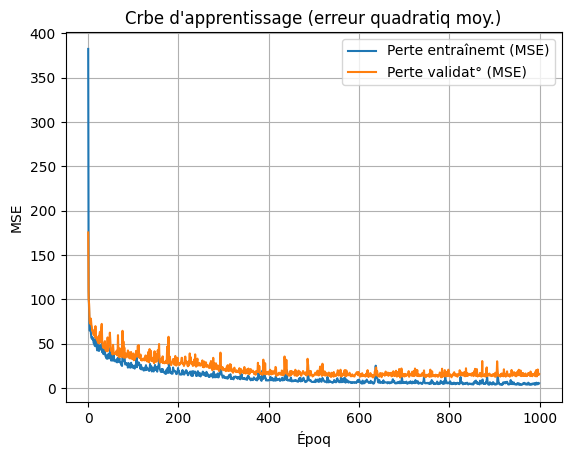

In [ ]:
plt.plot(history_initial.history['loss'], label='Perte entraînemt (MSE)')
plt.plot(history_initial.history['val_loss'], label='Perte validat° (MSE)')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Crbe d'apprentissage (erreur quadratiq moy.)")
plt.legend()
plt.grid(True)
plt.show()

Si la courbe d'entraînemt diminue mais q la courbe de validat° remonte ou reste stable, alrs le mdèle surapprend (overfitting). L'écart entre les 2 courbes est de + en + imprtant.

Si les 2 courbes st proches et diminuet régulièremt, c’est 1 bon signe de généralisat°.

In [ ]:
# Ajt de neurones :
model_increase = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Cpilat° :
model_increase.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt :
history_increase = model_increase.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 166.2490 - mse: 166.2490 - val_loss: 82.1716 - val_mse: 82.1716
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.5268 - mse: 67.5268 - val_loss: 69.1348 - val_mse: 69.1348
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 50.4784 - mse: 50.4784 - val_loss: 55.1146 - val_mse: 55.1146
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.6478 - mse: 47.6478 - val_loss: 54.0889 - val_mse: 54.0889
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.6718 - mse: 58.6718 - val_loss: 86.3583 - val_mse: 86.3583
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 47.4532 - mse: 47.4532 - val_loss: 50.2782 - val_mse: 50.2782
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.7705 - mse: 44.7705 - val_loss: 81.5594 - val_mse: 81.5594
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 62.8580 - mse: 62.8580 - val_loss: 53.7327 - val_mse: 53.7327
Epoch 9/1000
17/17 ━━

In [ ]:
# Évaluat° :
test_loss_increase, test_mse_increase = model_increase.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test augmentat° neurones:", round(test_mse_increase, 2))

📊 MSE sur les données de test augmentat° neurones: 38.33


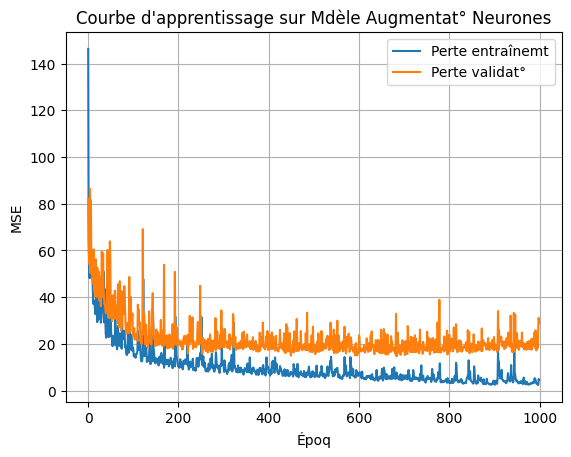

In [ ]:
# Visualisat° :
plt.plot(history_increase.history['loss'], label='Perte entraînemt')
plt.plot(history_increase.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage sur Mdèle Augmentat° Neurones")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Moins de neurones :
model_decrease = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Cpilat° :
model_decrease.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt :
history_decrease = model_decrease.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2554.0459 - mse: 2554.0459 - val_loss: 656.0509 - val_mse: 656.0509
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 512.1730 - mse: 512.1730 - val_loss: 131.1422 - val_mse: 131.1422
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.8052 - mse: 94.8052 - val_loss: 96.9737 - val_mse: 96.9737
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 72.1544 - mse: 72.1544 - val_loss: 88.2421 - val_mse: 88.2421
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 70.5947 - mse: 70.5947 - val_loss: 84.9017 - val_mse: 84.9017
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 75.4063 - mse: 75.4063 - val_loss: 86.8483 - val_mse: 86.8483
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 70.9617 - mse: 70.9617 - val_loss: 85.0151 - val_mse: 85.0151
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 73.6437 - mse: 73.6437 - val_loss: 79.3449 - val_mse: 79.3449
Epoch 9/1000


In [ ]:
# Évaluat° :
test_loss_decrease, test_mse_decrease = model_decrease.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test diminut° neurones:", round(test_mse_decrease, 2))

📊 MSE sur les données de test diminut° neurones: 29.23


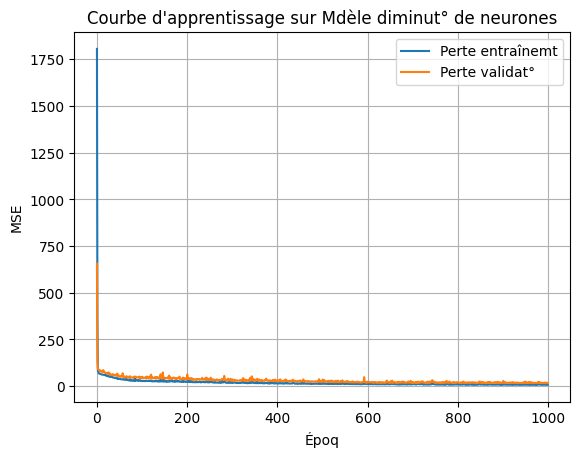

In [ ]:
# Visualisat° :
plt.plot(history_decrease.history['loss'], label='Perte entraînemt')
plt.plot(history_decrease.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage sur Mdèle diminut° de neurones")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Couche cachée supplémentaire :
model_hidden = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Cpilat° :
model_hidden.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt :
history_hidden = model_hidden.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 407.2404 - mse: 407.2404 - val_loss: 84.3762 - val_mse: 84.3762
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 55.1838 - mse: 55.1838 - val_loss: 71.3882 - val_mse: 71.3882
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 59.2233 - mse: 59.2233 - val_loss: 67.4375 - val_mse: 67.4375
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 70.1950 - mse: 70.1950 - val_loss: 67.8060 - val_mse: 67.8060
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.4679 - mse: 59.4679 - val_loss: 69.6744 - val_mse: 69.6744
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 61.3305 - mse: 61.3305 - val_loss: 68.6568 - val_mse: 68.6568
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 41.6754 - mse: 41.6754 - val_loss: 63.5290 - val_mse: 63.5290
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 53.6756 - mse: 53.6756 - val_loss: 69.3601 - val_mse: 69.3601
Epoch 9/1000
17/17 

In [ ]:
# Évaluat° :
test_loss_hidden, test_mse_hidden = model_hidden.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test couches cachées supplémentaires:", round(test_mse_hidden, 2))

📊 MSE sur les données de test couches cachées supplémentaires: 31.14


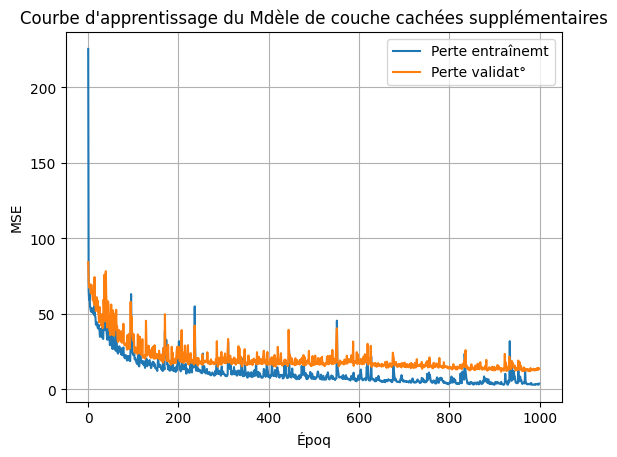

In [ ]:
# Visualisat° :
plt.plot(history_hidden.history['loss'], label='Perte entraînemt')
plt.plot(history_hidden.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Mdèle de couche cachées supplémentaires")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Ajt d'1 régularisat° :
model_regularizer = keras.Sequential([
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001), input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilat° :
model_regularizer.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt :
history_regularizer = model_regularizer.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 2002.9585 - mse: 2002.8765 - val_loss: 257.5692 - val_mse: 257.4948
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 313.6368 - mse: 313.5645 - val_loss: 131.6536 - val_mse: 131.5871
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 94.4847 - mse: 94.4199 - val_loss: 86.1138 - val_mse: 86.0535
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.6492 - mse: 58.5902 - val_loss: 77.1494 - val_mse: 77.0941
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 68.2642 - mse: 68.2099 - val_loss: 80.8600 - val_mse: 80.8085
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 57.2467 - mse: 57.1960 - val_loss: 70.5558 - val_mse: 70.5072
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.9102 - mse: 49.8621 - val_loss: 75.5879 - val_mse: 75.5415
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 59.8643 - mse: 59.8183 - val_loss: 70.3913 - val_mse: 70.3465
Epoch 9/1000

In [ ]:
# Évaluat° :
test_loss_regularizer, test_mse_regularizer = model_regularizer.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test de régulat°:", round(test_mse_regularizer, 2))

📊 MSE sur les données de test de régulat°: 28.55


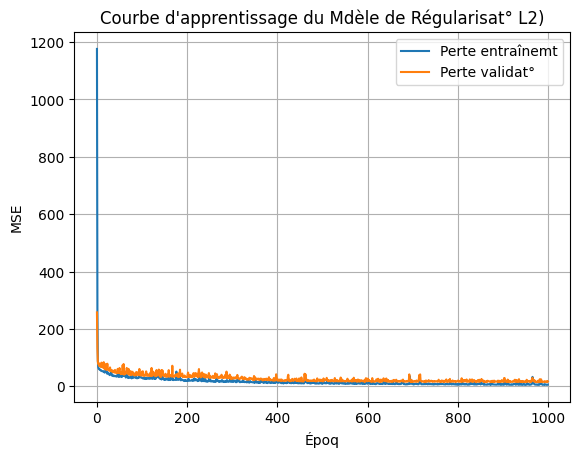

In [ ]:
# Visualisat° :
plt.plot(history_regularizer.history['loss'], label='Perte entraînemt')
plt.plot(history_regularizer.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Mdèle de Régularisat° L2)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Appliq 1 Dropout :
model_prevent_overfitting = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),  # 20% des neurones désactivés aléatoiremt
    layers.Dense(64, activation='relu'),
    Dropout(0.2),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilat° :
model_prevent_overfitting.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt :
history_prevent_overfitting = model_prevent_overfitting.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1696.1780 - mse: 1696.1780 - val_loss: 80.8287 - val_mse: 80.8287
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 866.1890 - mse: 866.1890 - val_loss: 81.1936 - val_mse: 81.1936
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 752.9242 - mse: 752.9242 - val_loss: 122.2126 - val_mse: 122.2126
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 419.7498 - mse: 419.7498 - val_loss: 85.1328 - val_mse: 85.1328
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 352.7614 - mse: 352.7614 - val_loss: 162.6169 - val_mse: 162.6169
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 335.8608 - mse: 335.8608 - val_loss: 80.3502 - val_mse: 80.3502
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 213.7596 - mse: 213.7596 - val_loss: 137.3800 - val_mse: 137.3800
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 209.7899 - mse: 209.7899 - val_loss: 102.0785 - val_mse: 102.07

In [ ]:
# Évaluat° :
test_loss_prevent_overfitting, test_mse_prevent_overfitting = model_prevent_overfitting.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test Dropout:", round(test_mse_prevent_overfitting, 2))

📊 MSE sur les données de test Dropout: 48.43


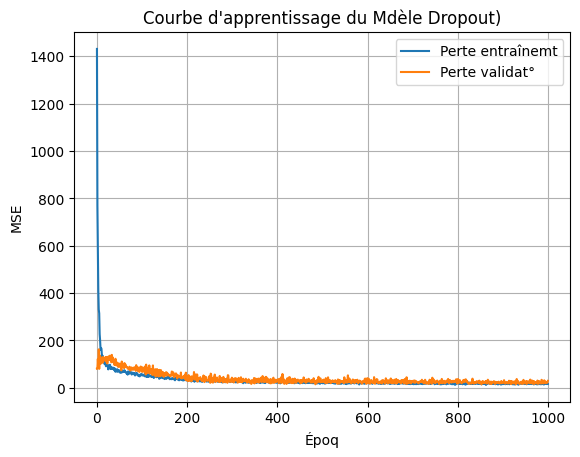

In [ ]:
# Visualisat° :
plt.plot(history_prevent_overfitting.history['loss'], label='Perte entraînemt')
plt.plot(history_prevent_overfitting.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Mdèle Dropout)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Appliq 1 EarlyStopping :
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Modèle de base
model_early_stop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compilat° :
model_early_stop.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [ ]:
# Entraînemt avec EarlyStopping :
history_early_stop = model_early_stop.fit(
    X_train, y_train,
    epochs=1000,
    batch_size=20,
    validation_split=0.2,
    verbose=1,
    callbacks=[early_stop]
)

Epoch 1/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 4099.3574 - mse: 4099.3579 - val_loss: 418.0110 - val_mse: 418.0110
Epoch 2/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 271.6864 - mse: 271.6864 - val_loss: 151.1941 - val_mse: 151.1941
Epoch 3/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 152.3102 - mse: 152.3102 - val_loss: 77.6282 - val_mse: 77.6282
Epoch 4/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 73.1944 - mse: 73.1944 - val_loss: 77.2774 - val_mse: 77.2774
Epoch 5/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 65.3402 - mse: 65.3402 - val_loss: 79.6284 - val_mse: 79.6284
Epoch 6/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 51.1916 - mse: 51.1916 - val_loss: 76.7738 - val_mse: 76.7738
Epoch 7/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 65.5420 - mse: 65.5420 - val_loss: 81.0263 - val_mse: 81.0263
Epoch 8/1000
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 53.2909 - mse: 53.2909 - val_loss: 73.6872 - val_mse: 73.6872
Epoch 9/100

In [ ]:
# Évaluat° :
test_loss_early_stop, test_mse_early_stop = model_early_stop.evaluate(X_test, y_test, verbose=0)
print("📊 MSE sur les données de test EarlyStopping :", round(test_mse_early_stop, 2))

📊 MSE sur les données de test EarlyStopping : 27.34


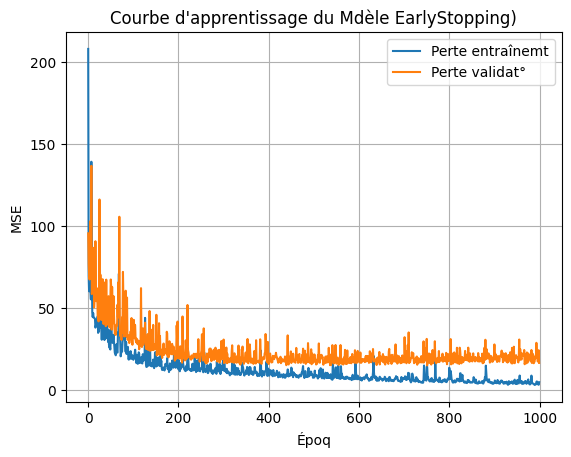

In [ ]:
# Visualisat° :
plt.plot(history.history['loss'], label='Perte entraînemt')
plt.plot(history.history['val_loss'], label='Perte validat°')
plt.xlabel('Époq')
plt.ylabel('MSE')
plt.title("Courbe d'apprentissage du Mdèle EarlyStopping)")
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
scores = {}

# Exemple après chaq test :
scores['initial'] = test_mse_initial
scores['increase'] = test_mse_increase
scores['decrease'] = test_mse_decrease
scores['hidden'] = test_mse_hidden
scores['regularizer'] = test_mse_regularizer
scores['Dropout'] = test_mse_prevent_overfitting
scores['EarlyStopping'] = test_mse_early_stop

In [ ]:
print("📊 Résumé des performances (MSE sur données de test) :\n")
for name, mse in scores.items():
    print(f"{name:<25} : {mse:.2f}")

📊 Résumé des performances (MSE sur données de test) :

initial                   : 23.87
increase                  : 38.33
decrease                  : 29.23
hidden                    : 31.14
regularizer               : 28.55
Dropout                   : 48.43
EarlyStopping             : 27.34


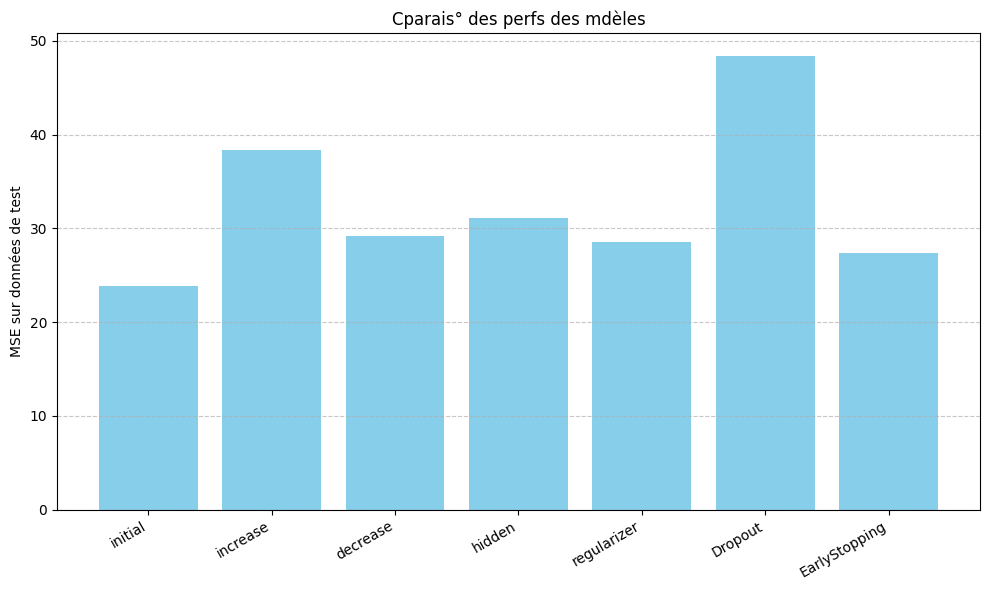

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylabel("MSE sur données de test")
plt.title("Cparais° des perfs des mdèles")
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()